Imports

In [24]:
import matplotlib.pyplot as plt

import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
pd.set_option('display.max_columns', None)
from tensorflow import keras
from tensorflow.keras.models import Sequential
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import *
from sklearn.model_selection import train_test_split 
from sklearn.utils import shuffle
from tensorflow.keras.callbacks import EarlyStopping

Load Data

In [72]:
df_train = pd.read_pickle("TrainingDataFinalized.pkl")

df_test = pd.read_pickle("TestDataFinalized.pkl")
df_test.reset_index(inplace=True,drop=True)


In [80]:
y_train = df_train['Litres']
y_test = df_test['Litres']
X_train = df_train.drop(labels=['Litres','WeekStarting'],axis=1)
X_test = df_test.drop(labels=['Litres','WeekStarting'],axis=1)


Performance Plotting Functions

In [47]:
def model_evolution_loss(history):  
    # summarize history for loss
    plt.ylim(0,4)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

# Evaluate accuracy on training set
def test_set_evalution(model, X_train, X_test, y_train, y_test):
    print("Train set evaluation:", model.evaluate(X_train,y_train))
    print("Test set evaluation:", model.evaluate(X_test,y_test))

In [49]:
X.shape

(384277, 28)

Train Validation split

In [50]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X_train,y_train,test_size=0.1)

Design NN

In [58]:
model = Sequential()

# hidden layers

model.add(Dense(units=25, activation='relu', input_dim=28))
model.add(Dense(units=25,activation='relu'))
model.add(Dense(units=25,activation='relu'))
model.add(Dense(units=20,activation='relu'))


# final layer
model.add(Dense(units=1,activation='linear'))

# Define custom optmizer?
#from keras.optimizers import SGD
#opt = SGD(learning_rate=0.1, momentum=0.9)

# Compile model
model.compile(loss="MeanSquaredLogarithmicError", optimizer='adam',metrics=['MeanSquaredLogarithmicError'])


In [59]:
# Train NN
early_stopping = EarlyStopping(monitor='val_loss', mode='min', patience=10, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=50, batch_size = 516,validation_data=(X_test,y_test), verbose=1,callbacks=[early_stopping])

Epoch 1/50
671/671 [==============================] - 3s 4ms/step - loss: 23.0577 - mean_squared_logarithmic_error: 23.0577 - val_loss: 4.1322 - val_mean_squared_logarithmic_error: 4.1322
Epoch 2/50
671/671 [==============================] - 3s 4ms/step - loss: 2.4637 - mean_squared_logarithmic_error: 2.4637 - val_loss: 1.5873 - val_mean_squared_logarithmic_error: 1.5873
Epoch 3/50
671/671 [==============================] - 3s 4ms/step - loss: 1.4176 - mean_squared_logarithmic_error: 1.4176 - val_loss: 1.2169 - val_mean_squared_logarithmic_error: 1.2169
Epoch 4/50
671/671 [==============================] - 3s 4ms/step - loss: 1.2154 - mean_squared_logarithmic_error: 1.2154 - val_loss: 1.1172 - val_mean_squared_logarithmic_error: 1.1172
Epoch 5/50
671/671 [==============================] - 3s 5ms/step - loss: 1.1473 - mean_squared_logarithmic_error: 1.1473 - val_loss: 1.0675 - val_mean_squared_logarithmic_error: 1.0675
Epoch 6/50
671/671 [==============================] - 3s 5ms/step - 

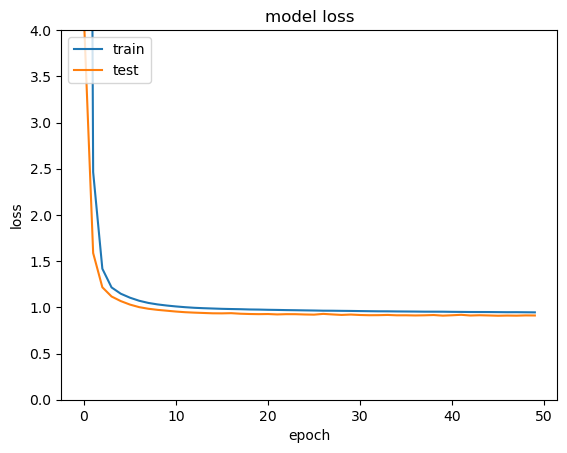

10808/10808 [==============================] - 26s 2ms/step - loss: 0.9433 - mean_squared_logarithmic_error: 0.9433
Train set evaluation: [0.9433209300041199, 0.9433209300041199]
1201/1201 [==============================] - 3s 3ms/step - loss: 0.9117 - mean_squared_logarithmic_error: 0.9117
Test set evaluation: [0.9116554260253906, 0.9116554260253906]


In [61]:
# Plot model evolution
model_evolution_loss(history)

# print metrics
test_set_evalution(model, X_train, X_test, y_train, y_test)

In [91]:
X_test.iloc[0,:].array

<PandasArray>
[ 0.49117221984435805,  -0.9290910633116359,  -0.2580411185539059,
 -0.29625134391493974,  -0.4312552311675832,  -2.2996386141086025,
   0.7302210651077258,  -0.7457883503329298,   0.6273770569701331,
  0.38341232977256334, -0.29915629675406213,  0.22815433327023235,
 -0.09472448761251069,  0.25245974347826006,   -1.671496785577542,
   -0.965676397593665,    0.965676397593665,  -0.4010733145705078,
  -0.1855843968809137, -0.47188122869814125, -0.23319667774453706,
    3.146362569124303,  -0.7188324718810698, -0.43969737934230524,
  -0.5945380617918008,  -0.5798116155635635,  -0.5755528886527491,
   1.7873166920416106]
Length: 28, dtype: float64

In [92]:
model.predict(X_test.iloc[0,:].array)

TypeError: Cannot convert the argument `type_value`: PandasDtype('float64') to a TensorFlow DType.

In [75]:
y_test_pred = []
for i in range(len(X_test)):
    new_pred = model.predict(X_test.iloc[i,:])
    y_test_pred += [new_pred]
    df_test.loc[i,"Litres"] = new_pred
    if i >0:
        df_test.loc[i,"Litres(w-1)"] = df_test.loc[i-1,"Litres"]
    if i >1:
        df_test.loc[i,"Litres(w-2)"] = df_test.loc[i-2,"Litres"]
    if i >2:
        df_test.loc[i,"Litres(w-3)"] = df_test.loc[i-3,"Litres"]
    if i >48:
        df_test.loc[i,"Litres(w-49)"] = df_test.loc[i-49,"Litres"]
    if i >49:
        df_test.loc[i,"Litres(w-50)"] = df_test.loc[i-50,"Litres"]
    if i >50:
        df_test.loc[i,"Litres(w-51)"] = df_test.loc[i-51,"Litres"]
    if i >51:
        df_test.loc[i,"Litres(w-52)"] = df_test.loc[i-52,"Litres"]


    
    

InvalidIndexError: (slice(None, None, None), 0)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [ ]:
scaler.fit(X)

StandardScaler()

In [ ]:
X_scaled = scaler.transform(X)

,WeekStarting,Litres,Price(t-1),NewCars,WeekendHolidays,WeekdayHolidays,GDPGrowth%,MoMInflation%,WoWUSDChange%,Litres(w-1),Litres(w-2),Litres(w-3),Litres(w-49),Litres(w-50),Litres(w-51),Litres(w-52),WeekNumber,Benzin,Motorin,Akdeniz Bölgesi,Doğu Anadolu Bölgesi,Ege Bölgesi,Güneydoğu Anadolu Bölgesi,Karadeniz Bölgesi,Marmara Bölgesi,İç Anadolu Bölgesi,Autumn,Fall,Summer,Winter
384277,2019-01-07,NaN,0.491172,-0.929091,-0.258041,-0.296251,-0.431255,-2.299639,0.730221,-0.745788,0.627377,0.383412,-0.299156,0.228154,-0.094724,0.252460,-1.671497,-0.965676,0.965676,-0.401073,-0.185584,-0.471881,-0.233197,3.146363,-0.718832,-0.439697,-0.594538,-0.579812,-0.575553,1.787317
384278,2019-01-14,NaN,0.657092,-0.929091,-0.258041,-0.296251,-0.431255,-1.300654,-1.031137,-0.745788,-0.752597,0.625312,-0.008146,-0.302799,0.226518,-0.097563,-1.604240,-0.965676,0.965676,-0.401073,-0.185584,-0.471881,-0.233197,3.146363,-0.718832,-0.439697,-0.594538,-0.579812,-0.575553,1.787317
384279,2019-01-21,NaN,0.841448,-0.929091,-0.258041,-0.296251,-0.431255,-1.300654,-0.581183,-0.745788,-0.752597,-0.754462,0.238194,-0.011817,-0.304248,0.223847,-1.536984,-0.965676,0.965676,-0.401073,-0.185584,-0.471881,-0.233197,3.146363,-0.718832,-0.439697,-0.594538,-0.579812,-0.575553,1.787317
384280,2019-01-28,NaN,0.841448,-0.969121,-0.258041,-0.296251,-0.431255,-1.300654,-0.592720,-0.745788,-0.752597,-0.754462,0.226504,0.234499,-0.013368,-0.307196,-1.469727,-0.965676,0.965676,-0.401073,-0.185584,-0.471881,-0.233197,3.146363,-0.718832,-0.439697,-0.594538,-0.579812,-0.575553,1.787317
384281,2019-02-04,NaN,0.841448,-0.969121,-0.258041,-0.296251,-0.431255,-1.300654,0.137974,-0.745788,-0.752597,-0.754462,-0.180530,0.222809,0.232861,-0.016165,-1.402471,-0.965676,0.965676,-0.401073,-0.185584,-0.471881,-0.233197,3.146363,-0.718832,-0.439697,-0.594538,-0.579812,-0.575553,1.787317
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
492744,2019-12-02,NaN,1.763225,-1.031720,-0.258041,-0.296251,-1.299962,1.004695,0.049522,-0.745788,-0.752597,-0.754462,-0.860097,-0.863684,-0.864936,-0.868177,1.489562,1.035544,-1.035544,-0.401073,5.388384,-0.471881,-0.233197,-0.317827,-0.718832,-0.439697,-0.594538,-0.579812,-0.575553,1.787317
492745,2019-12-09,NaN,1.763225,-1.031720,-0.258041,-0.296251,-0.627415,1.004695,0.061059,-0.745788,-0.752597,-0.754462,-0.860097,-0.863684,-0.864936,-0.868177,1.556818,1.035544,-1.035544,-0.401073,5.388384,-0.471881,-0.233197,-0.317827,-0.718832,-0.439697,-0.594538,-0.579812,-0.575553,1.787317
492746,2019-12-16,NaN,1.763225,-1.031720,-0.258041,-0.296251,-0.627415,-0.551416,0.699455,-0.745788,-0.752597,-0.754462,-0.860097,-0.863684,-0.864936,-0.868177,1.624075,1.035544,-1.035544,-0.401073,5.388384,-0.471881,-0.233197,-0.317827,-0.718832,-0.439697,-0.594538,-0.579812,-0.575553,1.787317
492747,2019-12-23,NaN,1.763225,-1.031720,-0.258041,-0.296251,-0.627415,-0.551416,-0.062005,-0.745788,-0.752597,-0.754462,-0.860097,-0.863684,-0.864936,-0.868177,1.691331,1.035544,-1.035544,-0.401073,5.388384,-0.471881,-0.233197,-0.317827,-0.718832,-0.439697,-0.594538,-0.579812,-0.575553,1.787317


In [74]:
df_test.loc[1,"Litres(w-51)"]

0.22651844040691838

In [ ]:
# Function to add week lag

def add_time_lag(week_lag,df):
    df_lag = df[["Customer","Area","Product","WeekStarting", "Litres"]].copy()
    df_lag["WeekStarting"] = df_lag["WeekStarting"] + pd.to_timedelta(week_lag,unit="w")
    df_lag.rename(columns={"Litres":f"Litres(w-{week_lag})"}, inplace=True)
    df = df_train.merge(df_lag,how="left")
    return df_train